In [7]:
import numpy as np
import scipy.stats as stats
# import math
import gpflow
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, Exponentiation,RationalQuadratic, WhiteKernel

### Step 1: GP Fit

In [11]:
# %%timeit
X = np.array([0.865, 0.666, 0.804, 0.771, 0.147, 0.866, 0.007, 0.026, 0.171, 0.889, 0.243, 0.028]).reshape(-1, 1)
Y = np.array([1.57, 3.48, 3.12, 3.91, 3.07, 1.35, 3.80,3.82, 3.49,1.30, 4.00, 3.82]).reshape(-1,1)
# plt.plot(X, Y, "kx", mew=2)

def step1(X, Y, kernel= None):
    """
    Fit GP to demand
    run once per product

    :param X: X values with shape (-1, 1)
    :param Y: Y values with shape (-1, 1)
    :param kernel: kernel for the GP
    :return: GPR model
    """

    kernel = kernel
    gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gaussian_process.fit(X, Y)
    return gaussian_process

model = step1(X,Y, kernel = 1 * RationalQuadratic(alpha= 10, length_scale=100) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-5, 1e2)))
print(model)

GaussianProcessRegressor(kernel=1**2 * RationalQuadratic(alpha=10, length_scale=100) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=10)


In [12]:
### Plot model to check
Xplot = np.linspace(-0.1, 1.1, 100)
f_mean, f_var = model.predict(Xplot.reshape(-1,1), return_std=True)

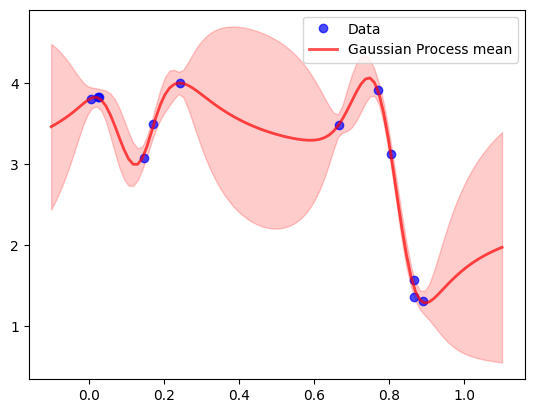

In [13]:
plt.plot(X, Y, 'bo', label="""Data""", alpha=0.7)
plt.plot(Xplot, f_mean, 'r', linewidth=2, label='Gaussian Process mean', alpha=0.7)
plt.fill_between(Xplot, f_mean - f_var, f_mean + f_var, alpha=0.2, color='r')
# plt.title("""Ackley's function at $y=0$, GP fit with random samples""", fontsize=14); plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.legend(); plt.show();